# Plotting the dynamics of allelic accessibility changes in the different clusters

In [103]:
library(readr)
library(DiffBind)
library(DESeq2)
library(dplyr)
library(tidyr)
library(ggplot2)
library(viridis)
library(ggridges)
library(readxl)
library(gplots)

In [104]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/ATAC_analysis/Allelic_ATAC/dynamics_per_cluster/")

In [105]:
ATAC_Allele_chrX_clusters_dynamics <- read_excel("ATAC_Allele_chrX_clusters_dynamics.xlsx")

In [106]:
head(ATAC_Allele_chrX_clusters_dynamics)

Day0_ratio,Day8_ratio,Day9_ratio,Day10_ratio,Day12_ratio,iPSCs_ratio,cluster
0.244444444444444,0.258064516129032,0.269230769230769,0.214285714285714,0.5625,0.466666666666667,1
0.25,0.411764705882353,0.352941176470588,0.266666666666667,0.0714285714285714,0.520833333333333,1
0.7,0.0714285714285714,0.1,0.235294117647059,0.565217391304348,0.554285714285714,1
0.4,0.414634146341463,0.216216216216216,0.355555555555556,0.326086956521739,0.613636363636364,1
0.303030303030303,0.285714285714286,0.366666666666667,0.261904761904762,0.529411764705882,0.666666666666667,1
0.285714285714286,0.277777777777778,0.454545454545455,0.166666666666667,0.388888888888889,0.418604651162791,1


In [107]:
nrow(ATAC_Allele_chrX_clusters_dynamics)

[1] 750

In [110]:
class(ATAC_Allele_chrX_clusters_dynamics)

[1] "tbl_df"     "tbl"        "data.frame"

In [111]:
variables <- c("Day0_ratio", "Day8_ratio", "Day9_ratio","Day10_ratio","Day12_ratio","iPSCs_ratio")

In [112]:
ATAC_Allele_chrX_clusters_dynamics_short <- ATAC_Allele_chrX_clusters_dynamics[variables]

In [113]:
head(ATAC_Allele_chrX_clusters_dynamics_short)

Day0_ratio,Day8_ratio,Day9_ratio,Day10_ratio,Day12_ratio,iPSCs_ratio
0.244444444444444,0.258064516129032,0.269230769230769,0.214285714285714,0.5625,0.466666666666667
0.25,0.411764705882353,0.352941176470588,0.266666666666667,0.0714285714285714,0.520833333333333
0.7,0.0714285714285714,0.1,0.235294117647059,0.565217391304348,0.554285714285714
0.4,0.414634146341463,0.216216216216216,0.355555555555556,0.326086956521739,0.613636363636364
0.303030303030303,0.285714285714286,0.366666666666667,0.261904761904762,0.529411764705882,0.666666666666667
0.285714285714286,0.277777777777778,0.454545454545455,0.166666666666667,0.388888888888889,0.418604651162791


In [114]:
ATAC_Allele_chrX_clusters_dynamics_short <- gather(ATAC_Allele_chrX_clusters_dynamics_short)

In [115]:
ATAC_Allele_chrX_clusters_dynamics_short$key <- factor(ATAC_Allele_chrX_clusters_dynamics_short$key, levels = c("Day0_ratio", "Day8_ratio","Day9_ratio","Day10_ratio","Day12_ratio","iPSCs_ratio"))

In [116]:
head(ATAC_Allele_chrX_clusters_dynamics_short)

key,value
Day0_ratio,0.244444444444444
Day0_ratio,0.25
Day0_ratio,0.7
Day0_ratio,0.4
Day0_ratio,0.303030303030303
Day0_ratio,0.285714285714286


In [117]:
ATAC_Allele_chrX_clusters_dynamics_short$cluster <- rep(ATAC_Allele_chrX_clusters_dynamics$cluster,6)

In [118]:
head(ATAC_Allele_chrX_clusters_dynamics_short)

key,value,cluster
Day0_ratio,0.244444444444444,1
Day0_ratio,0.25,1
Day0_ratio,0.7,1
Day0_ratio,0.4,1
Day0_ratio,0.303030303030303,1
Day0_ratio,0.285714285714286,1


In [156]:
ATAC_Allele_chrX_clusters_dynamics_short$value <- as.numeric(as.character(ATAC_Allele_chrX_clusters_dynamics_short$value))

In [157]:
class(ATAC_Allele_chrX_clusters_dynamics_short$value)

[1] "numeric"

In [158]:
nrow(subset(ATAC_Allele_chrX_clusters_dynamics,ATAC_Allele_chrX_clusters_dynamics$cluster == 1))
nrow(subset(ATAC_Allele_chrX_clusters_dynamics,ATAC_Allele_chrX_clusters_dynamics$cluster == 2))
nrow(subset(ATAC_Allele_chrX_clusters_dynamics,ATAC_Allele_chrX_clusters_dynamics$cluster == 3))
nrow(subset(ATAC_Allele_chrX_clusters_dynamics,ATAC_Allele_chrX_clusters_dynamics$cluster == 4))
nrow(subset(ATAC_Allele_chrX_clusters_dynamics,ATAC_Allele_chrX_clusters_dynamics$cluster == 5))
nrow(subset(ATAC_Allele_chrX_clusters_dynamics,ATAC_Allele_chrX_clusters_dynamics$cluster == 6))
nrow(subset(ATAC_Allele_chrX_clusters_dynamics,ATAC_Allele_chrX_clusters_dynamics$cluster == 7))
nrow(subset(ATAC_Allele_chrX_clusters_dynamics,ATAC_Allele_chrX_clusters_dynamics$cluster == 8))
nrow(subset(ATAC_Allele_chrX_clusters_dynamics,ATAC_Allele_chrX_clusters_dynamics$cluster == 9))
nrow(subset(ATAC_Allele_chrX_clusters_dynamics,ATAC_Allele_chrX_clusters_dynamics$cluster == 10))

[1] 38

[1] 134

[1] 81

[1] 42

[1] 122

[1] 22

[1] 7

[1] 59

[1] 141

[1] 104

In [179]:
cluster1 <- subset(ATAC_Allele_chrX_clusters_dynamics_short, ATAC_Allele_chrX_clusters_dynamics_short$cluster == 1)
cluster1$group <- rep(c(1:38),6)

cluster2 <- subset(ATAC_Allele_chrX_clusters_dynamics_short, ATAC_Allele_chrX_clusters_dynamics_short$cluster == 2)
cluster2$group <- rep(c(1:134),6)

cluster3 <- subset(ATAC_Allele_chrX_clusters_dynamics_short, ATAC_Allele_chrX_clusters_dynamics_short$cluster == 3)
cluster3$group <- rep(c(1:81),6)

cluster4 <- subset(ATAC_Allele_chrX_clusters_dynamics_short, ATAC_Allele_chrX_clusters_dynamics_short$cluster == 4)
cluster4$group <- rep(c(1:42),6)

cluster5 <- subset(ATAC_Allele_chrX_clusters_dynamics_short, ATAC_Allele_chrX_clusters_dynamics_short$cluster == 5)
cluster5$group <- rep(c(1:122),6)

cluster6 <- subset(ATAC_Allele_chrX_clusters_dynamics_short, ATAC_Allele_chrX_clusters_dynamics_short$cluster == 6)
cluster6$group <- rep(c(1:22),6)

cluster7 <- subset(ATAC_Allele_chrX_clusters_dynamics_short, ATAC_Allele_chrX_clusters_dynamics_short$cluster == 7)
cluster7$group <- rep(c(1:7),6)

cluster8 <- subset(ATAC_Allele_chrX_clusters_dynamics_short, ATAC_Allele_chrX_clusters_dynamics_short$cluster == 8)
cluster8$group <- rep(c(1:59),6)

cluster9 <- subset(ATAC_Allele_chrX_clusters_dynamics_short, ATAC_Allele_chrX_clusters_dynamics_short$cluster == 9)
cluster9$group <- rep(c(1:141),6)

cluster10 <- subset(ATAC_Allele_chrX_clusters_dynamics_short, ATAC_Allele_chrX_clusters_dynamics_short$cluster == 10)
cluster10$group <- rep(c(1:104),6)

Saving 6.67 x 6.67 in image


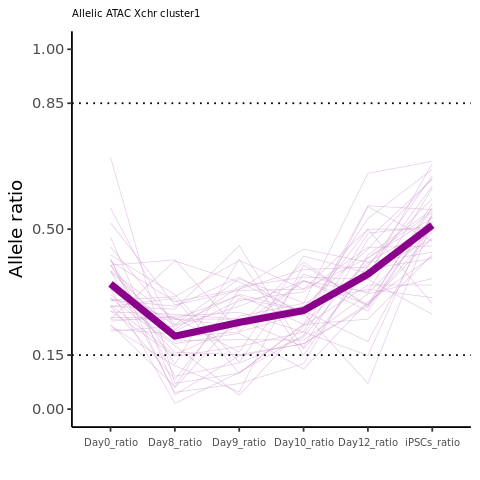

In [180]:
options(repr.plot.width=4, repr.plot.height=4)
cluster1 <- ggplot(cluster1 , aes(x=key,y=value, color = cluster, group = group))+
                            geom_line(colour = "plum3", size =0.2, alpha = 0.5)+
                           stat_summary(aes(group=cluster), fun.y=mean, geom="line",colour = "darkmagenta", size = 2)+
scale_y_continuous(breaks = c(0.0,0.15,0.5,0.85,1), limits=c(0.0,1))+
geom_hline(yintercept=0.15,linetype="dotted")+
geom_hline(yintercept=0.85,linetype="dotted")+
ggtitle("Allelic ATAC Xchr cluster1") +                             
theme(plot.title = element_text(size=6))+
xlab("") + 
ylab("Allele ratio")+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=6))+
theme(legend.title=element_blank())+
theme(axis.line = element_line(colour = "black"),
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(),
panel.border = element_blank(),
panel.background = element_blank())
ggsave("cluster1.pdf")

cluster1

Saving 6.67 x 6.67 in image


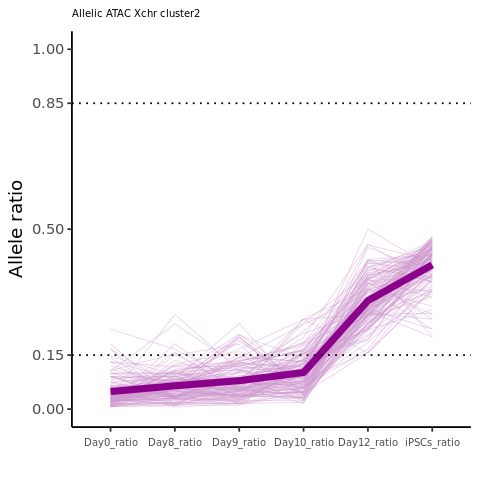

In [181]:
options(repr.plot.width=4, repr.plot.height=4)
cluster2 <- ggplot(cluster2 , aes(x=key,y=value, color = cluster, group = group))+
                            geom_line(colour = "plum3", size =0.2, alpha = 0.5)+
                           stat_summary(aes(group=cluster), fun.y=mean, geom="line",colour = "darkmagenta", size = 2)+
scale_y_continuous(breaks = c(0.0,0.15,0.5,0.85,1), limits=c(0.0,1))+
geom_hline(yintercept=0.15,linetype="dotted")+
geom_hline(yintercept=0.85,linetype="dotted")+
ggtitle("Allelic ATAC Xchr cluster2") +                             
theme(plot.title = element_text(size=6))+
xlab("") + 
ylab("Allele ratio")+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=6))+
theme(legend.title=element_blank())+
theme(axis.line = element_line(colour = "black"),
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(),
panel.border = element_blank(),
panel.background = element_blank())
ggsave("cluster2.pdf")

cluster2

Saving 6.67 x 6.67 in image


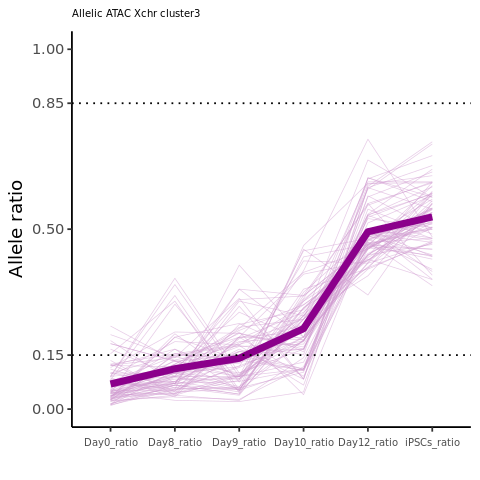

In [182]:
options(repr.plot.width=4, repr.plot.height=4)
cluster3 <- ggplot(cluster3 , aes(x=key,y=value, color = cluster, group = group))+
                            geom_line(colour = "plum3", size =0.2, alpha = 0.5)+
                           stat_summary(aes(group=cluster), fun.y=mean, geom="line",colour = "darkmagenta", size = 2)+
scale_y_continuous(breaks = c(0.0,0.15,0.5,0.85,1), limits=c(0.0,1))+
geom_hline(yintercept=0.15,linetype="dotted")+
geom_hline(yintercept=0.85,linetype="dotted")+
ggtitle("Allelic ATAC Xchr cluster3") +                             
theme(plot.title = element_text(size=6))+
xlab("") + 
ylab("Allele ratio")+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=6))+
theme(legend.title=element_blank())+
theme(axis.line = element_line(colour = "black"),
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(),
panel.border = element_blank(),
panel.background = element_blank())
ggsave("cluster3.pdf")

cluster3

Saving 6.67 x 6.67 in image


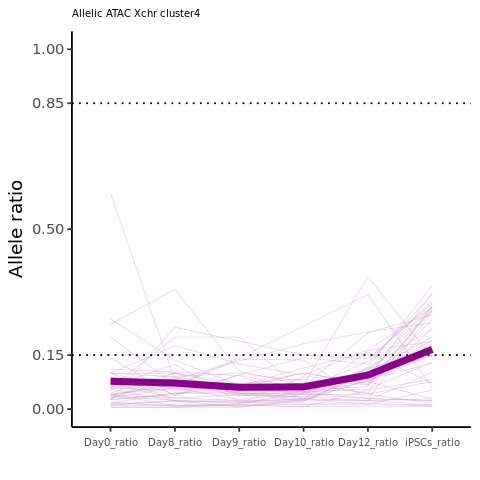

In [183]:
options(repr.plot.width=4, repr.plot.height=4)
cluster4 <- ggplot(cluster4 , aes(x=key,y=value, color = cluster, group = group))+
                            geom_line(colour = "plum3", size =0.2, alpha = 0.5)+
                           stat_summary(aes(group=cluster), fun.y=mean, geom="line",colour = "darkmagenta", size = 2)+
scale_y_continuous(breaks = c(0.0,0.15,0.5,0.85,1), limits=c(0.0,1))+
geom_hline(yintercept=0.15,linetype="dotted")+
geom_hline(yintercept=0.85,linetype="dotted")+
ggtitle("Allelic ATAC Xchr cluster4") +                             
theme(plot.title = element_text(size=6))+
xlab("") + 
ylab("Allele ratio")+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=6))+
theme(legend.title=element_blank())+
theme(axis.line = element_line(colour = "black"),
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(),
panel.border = element_blank(),
panel.background = element_blank())
ggsave("cluster4.pdf")

cluster4

Saving 6.67 x 6.67 in image


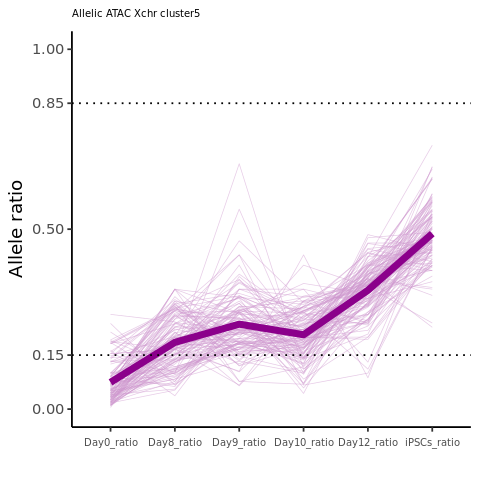

In [184]:
options(repr.plot.width=4, repr.plot.height=4)
cluster5 <- ggplot(cluster5 , aes(x=key,y=value, color = cluster, group = group))+
                            geom_line(colour = "plum3", size =0.2, alpha = 0.5)+
                           stat_summary(aes(group=cluster), fun.y=mean, geom="line",colour = "darkmagenta", size = 2)+
scale_y_continuous(breaks = c(0.0,0.15,0.5,0.85,1), limits=c(0.0,1))+
geom_hline(yintercept=0.15,linetype="dotted")+
geom_hline(yintercept=0.85,linetype="dotted")+
ggtitle("Allelic ATAC Xchr cluster5") +                             
theme(plot.title = element_text(size=6))+
xlab("") + 
ylab("Allele ratio")+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=6))+
theme(legend.title=element_blank())+
theme(axis.line = element_line(colour = "black"),
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(),
panel.border = element_blank(),
panel.background = element_blank())
ggsave("cluster5.pdf")

cluster5

Saving 6.67 x 6.67 in image


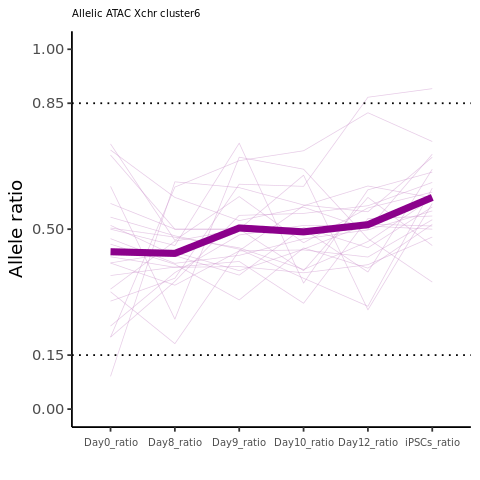

In [185]:
options(repr.plot.width=4, repr.plot.height=4)
cluster6 <- ggplot(cluster6 , aes(x=key,y=value, color = cluster, group = group))+
                            geom_line(colour = "plum3", size =0.2, alpha = 0.5)+
                           stat_summary(aes(group=cluster), fun.y=mean, geom="line",colour = "darkmagenta", size = 2)+
scale_y_continuous(breaks = c(0.0,0.15,0.5,0.85,1), limits=c(0.0,1))+
geom_hline(yintercept=0.15,linetype="dotted")+
geom_hline(yintercept=0.85,linetype="dotted")+
ggtitle("Allelic ATAC Xchr cluster6") +                             
theme(plot.title = element_text(size=6))+
xlab("") + 
ylab("Allele ratio")+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=6))+
theme(legend.title=element_blank())+
theme(axis.line = element_line(colour = "black"),
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(),
panel.border = element_blank(),
panel.background = element_blank())
ggsave("cluster6.pdf")

cluster6

Saving 6.67 x 6.67 in image


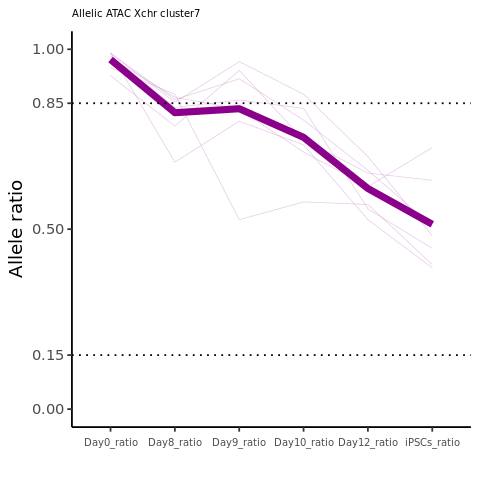

In [186]:
options(repr.plot.width=4, repr.plot.height=4)
cluster7 <- ggplot(cluster7 , aes(x=key,y=value, color = cluster, group = group))+
                            geom_line(colour = "plum3", size =0.2, alpha = 0.5)+
                           stat_summary(aes(group=cluster), fun.y=mean, geom="line",colour = "darkmagenta", size = 2)+
scale_y_continuous(breaks = c(0.0,0.15,0.5,0.85,1), limits=c(0.0,1))+
geom_hline(yintercept=0.15,linetype="dotted")+
geom_hline(yintercept=0.85,linetype="dotted")+
ggtitle("Allelic ATAC Xchr cluster7") +                             
theme(plot.title = element_text(size=6))+
xlab("") + 
ylab("Allele ratio")+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=6))+
theme(legend.title=element_blank())+
theme(axis.line = element_line(colour = "black"),
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(),
panel.border = element_blank(),
panel.background = element_blank())
ggsave("cluster7.pdf")

cluster7

Saving 6.67 x 6.67 in image


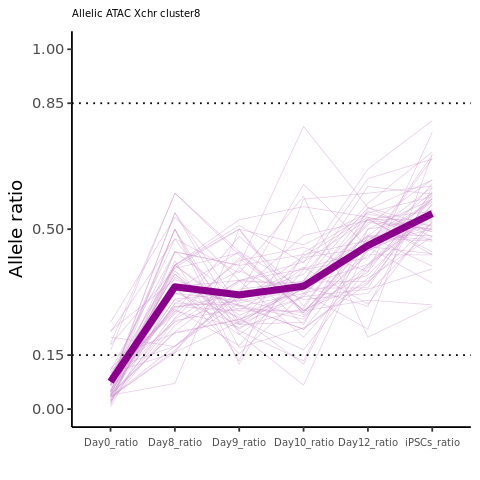

In [187]:
options(repr.plot.width=4, repr.plot.height=4)
cluster8 <- ggplot(cluster8 , aes(x=key,y=value, color = cluster, group = group))+
                            geom_line(colour = "plum3", size =0.2, alpha = 0.5)+
                           stat_summary(aes(group=cluster), fun.y=mean, geom="line",colour = "darkmagenta", size = 2)+
scale_y_continuous(breaks = c(0.0,0.15,0.5,0.85,1), limits=c(0.0,1))+
geom_hline(yintercept=0.15,linetype="dotted")+
geom_hline(yintercept=0.85,linetype="dotted")+
ggtitle("Allelic ATAC Xchr cluster8") +                             
theme(plot.title = element_text(size=6))+
xlab("") + 
ylab("Allele ratio")+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=6))+
theme(legend.title=element_blank())+
theme(axis.line = element_line(colour = "black"),
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(),
panel.border = element_blank(),
panel.background = element_blank())
ggsave("cluster8.pdf")

cluster8


Saving 6.67 x 6.67 in image


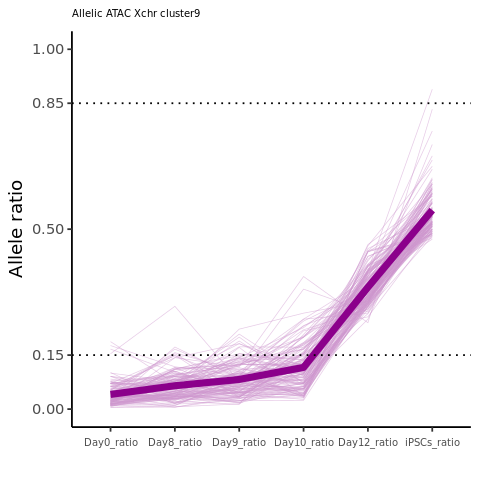

In [188]:
options(repr.plot.width=4, repr.plot.height=4)
cluster9 <- ggplot(cluster9 , aes(x=key,y=value, color = cluster, group = group))+
                            geom_line(colour = "plum3", size =0.2, alpha = 0.5)+
                           stat_summary(aes(group=cluster), fun.y=mean, geom="line",colour = "darkmagenta", size = 2)+
scale_y_continuous(breaks = c(0.0,0.15,0.5,0.85,1), limits=c(0.0,1))+
geom_hline(yintercept=0.15,linetype="dotted")+
geom_hline(yintercept=0.85,linetype="dotted")+
ggtitle("Allelic ATAC Xchr cluster9") +                             
theme(plot.title = element_text(size=6))+
xlab("") + 
ylab("Allele ratio")+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=6))+
theme(legend.title=element_blank())+
theme(axis.line = element_line(colour = "black"),
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(),
panel.border = element_blank(),
panel.background = element_blank())
ggsave("cluster9.pdf")

cluster9

Saving 6.67 x 6.67 in image


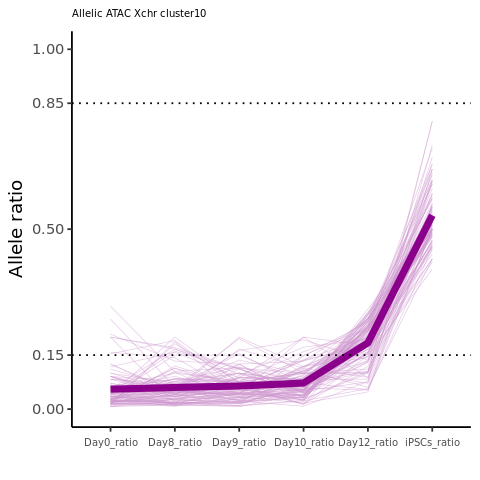

In [189]:
options(repr.plot.width=4, repr.plot.height=4)
cluster10 <- ggplot(cluster10 , aes(x=key,y=value, color = cluster, group = group))+
                            geom_line(colour = "plum3", size =0.2, alpha = 0.5)+
                           stat_summary(aes(group=cluster), fun.y=mean, geom="line",colour = "darkmagenta", size = 2)+
scale_y_continuous(breaks = c(0.0,0.15,0.5,0.85,1), limits=c(0.0,1))+
geom_hline(yintercept=0.15,linetype="dotted")+
geom_hline(yintercept=0.85,linetype="dotted")+
ggtitle("Allelic ATAC Xchr cluster10") +                             
theme(plot.title = element_text(size=6))+
xlab("") + 
ylab("Allele ratio")+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=6))+
theme(legend.title=element_blank())+
theme(axis.line = element_line(colour = "black"),
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(),
panel.border = element_blank(),
panel.background = element_blank())
ggsave("cluster10.pdf")

cluster10